### This is the official kernel for this dataset created by the uploader. This kernel covers only the visualization part for the data. For any idealised extensions to this, this notebook can be forked and further worked upon.
<br>
# **About the Project**
The highest grossing movies of each year are not necessarily the best movies of that year. And more often than not, the ones scooping up all the awards don't end up as the highest grossing ones or *box-office hits*. 
The highest grossing ones are those which audiences have watched the most at cinemas and hence, the gross.

In this project, the different correlations between the relevant information about each film, viz. the length of a film, the rating of a film and the distributing studio to name a few, are charted against other factors.

*The main aim of this project is to find out whether or not we find any robust correlation between any two of these parameters.*

# **Exploratory Analysis**
## A. Importing libraries
To begin this exploratory analysis, we first import libraries and define functions for reading and manipulating the data using `numpy` and `pandas`. 

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## B. Reading the data
We read the data and store it in a dataframe `data` using `read_csv`.

In [49]:
dataset = pd.read_csv('../input/blockbusters.csv')

## C. Analysing the data
Taking a look how the data looks like. 

In [50]:
dataset.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


We see from `data.head()` that `data` has 11 columns. 
* **Main_Genre** - The most relevant genre of the film. 
* **Genre_2** - The most relevant sub-genre of the film. 
* **Genre_3** - The lesser relevant sub-genre of the film.
* **imdb_rating** - The IMDb rating of the film, scraped from the official [IMDb website](https://www.imdb.com/).
* **length** - The length of the film in minutes. 
* **rank_in_year** - The rank of the film (1 to 10) in that year, according to higher gross. 
* **rating** - The maturity index of a film, namely G, PG, PG-13 and R, given by [Motion Picture Association of America](https://www.mpaa.org/film-ratings/).
* **studio** - The studio house that distributes the film worldwide. *While cleaning the data, I replaced every studio name with its parent studio to avoid sparsity. All the studios which are not present now, or have been bought by other studios, are also replaced.*
* **title** - Obviously, the name of the film. 
* **worldwide_gross** - The total gross of the film, Domestic and Worldwide, in dollars, from [Box Office Mojo](https://www.boxofficemojo.com/).
* **year** - The year of release for the film.

## D. Modifying the data
As the name of the notebook suggests, the most important column, which we will be trying to build relations from, is the `worldwide_gross`. But as we can pretty well assume from the values in the column, the row values are spersed with symbols like $ and , (comma). And the dataset cannot be blamed, because without symbols like these, the values, which are grosses in dollars, would seem too vague. But for our project, for charting the graphs, we cannot let them be like that, because we cannot deal with that many number of unique categorical variables. 

So we :

#### 1. Trim out the symbols from the string values. 

In [51]:
for i, row in dataset.iterrows(): #Iterate through each row of dataframe
    gross = dataset.worldwide_gross[i]
    gross = gross.replace('$','') #Trims $ from the values
    gross = gross.replace(',','') #Trims , from the values.
    dataset.worldwide_gross[i] = gross

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<br>
#### 2. Changing the string values to numerical ones.
One another thing that we do in this step to reduce sparsity is divide the gross values by `1000000`, to change the gross amounts to millions of dollars. And we also finally change the values to `int`, because we do not need that much accuracy in the form of decimal points for gross when we are plotting the charts.

In [52]:
for i, row in dataset.iterrows():
    gross = dataset.worldwide_gross[i]
    gross = float(gross)
    gross = gross/1000000
    dataset.worldwide_gross[i] = int(gross)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<br>
Now we check whether what we did worked or not. 

In [53]:
dataset.worldwide_gross[0]

700

As we can see the first value of `worldwide_gross` has changed from  $`700,059,566` to just a `700`. So, our job is done in trimming out the symbols and also expressing the amount in millions of dollars, approximately. 

In [54]:
type(dataset.worldwide_gross[0])

int

The type of the value has also been changed to `int`, which we actually wanted. 

So, yay! We are now perfectly ready to jump into the main part of this project, which is the data visualization part of it. 

<br>
# **Visualization of Data**
In the previous step, we modified whatever data we had to and now we are ready to come down to the final part and the most fun part of this project, checking whether we can find correlations between the columns.

*I already have charted all pairs of parameters, which I thought would have little or big correlations between them. Any other pairs, which have not been charted, can be done by forking this notebook.*

The plots are categorized according to one parameter, say `imdb_rating` or `length`, and all possible charts are shown as sub-bullets under the main parameter. 

<br>
## 1. IMDb Rating
IMDb ratings along with Rotten Tomatoes may not be the only yardsticks to measure a film's greatness by, but according to me,they do play a substantial role in estimating it. IMDb, for a fact is one of the most reliable websites you could get ratings from. All IMDb ratings of all the movies are scraped and collected in `imdb_rating` column of our `dataset`.

###  IMDb Rating versus Main Genre of the film
The most relevant genre of the film is stored in the `Main_Genre` column of our `dataset`. 

In [55]:
# mandatory imports for offline plotting of plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace1 = go.Scatter( # for plotting scatter graph, go.Scatter is used
        y = dataset.imdb_rating,
        x = dataset.Main_Genre,
        marker = dict(color = 'orange', size = 7, opacity = 0.5), # marker attributes inside graph
        mode = "markers",
        text = dataset.title # text for each marker during hover
)

data = [trace1]

layout = go.Layout(
    title = 'IMDb ratings v/s Genres of Highest Grossing Films (1975-2018)',
    xaxis = dict(showgrid = True, zeroline = True, gridwidth = 2), 
    yaxis = dict(title = 'IMDb Rating', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
# for offline glue-ing of plot into notebook
init_notebook_mode(connected=True)
iplot(fig)

From the above graph, the following conclusions can be drawn.
* The highest rated film is a **Drama** film (*The Dark Knight*).
* The second highest rated films are a **History** film (*Schindler's List*), and a **Fantasy** film (*The Lord of the Rings : Return of the King*).
* The lowest rated film is, not according to popular belief, a **Romance** film (*Staying Alive*).
* Between ratings **8 - 9**, there lie 
    1. the least number of **Sport**, **History**, **Family**, **Crime**, **Horror**, **Music** and **Action** films and 
    2. the most number of **War, Drama, Thriller, Comedy, Fantasy, Romance** and **Sci-Fi** films. 
* Between ratings **7 - 8**, 
    1. the most significant genres are **Comedy, Fantasy, Romance, Thriller, Sci-Fi** and **Action** 
    2. the least significant is **Sport**, but that can be because over the whole graph, Sport films are rare. 
* Between ratings **6 - 7**, the same trend remains. 
* Below **5**, the most populated gridline is of **Fantasy** with 3 films. So, as much as Fantasy had its victory with Lord of the Rings grabbing the second highest rating, it also underperforms the most. 
Brilliant news for Twilight haters though! All 3 of these films are of the Twilight franchise. 

###  IMDb Rating versus Length of a film
The length(in minutes) for each of the films is stored in `length` column of our `data`.

In [56]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace = go.Scatter(
    x = dataset.imdb_rating,
    y = dataset.length,
    text = dataset.title,
    marker = dict(color = 'blue', size = 7, opacity = 0.5),
    mode = 'markers'
)

data = [trace]

layout = go.Layout(
    title = 'Lengths v/s IMDb Ratings of Highest Grossing Films (1975-2018)',
    xaxis = dict(title = 'IMDb Rating', gridwidth = 2),
    yaxis = dict(title = 'Length (in minutes)', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

figure = go.Figure(data = data, layout = layout)
init_notebook_mode(connected=True)
iplot(figure)

From the above graph, the following conclusions can be drawn.
* The highest rated film at an IMDb rating of 9, is around **150 minutes** long. 
* The lowest rated film has a relatively low length of around **90 minutes**.
* Between ratings **8 - 9**, 
    1. There lies the longest film from the entire dataset, which is of a little more than **200 minutes**.
    2. There are about 7 films which have a length between **175-200 minutes**, which is usually a bit more lengthier than the mean of the lengths. 
    3. The most concentrated spectrum is between **100-150 minutes**, which is the same case for almost all rating ranges. 
    4. The least lengthy film is of around **80 minutes**.
    
* Between ratings **7 - 8**, 
    1. The longest film is around **190 minutes** long.
    2. The spectrum between **80-160 minutes** is extremely populated, which is almost the same as of rating range 8-9.
    3. Here also occurs the shortest film of **27 minutes**, which is a documentary, if you check `dataset`.
    
* Between ratings **6 - 7**,
    1. The most populated spectrum remains the same as the previous two ranges, but the deviation is close to none here. All the films are between **80-160 minutes** long. 
 
* Below a rating of **5**,
    1. The length range decreases further to about **90-130 minutes** long. 
    
**Note**: Throughout the whole graph, a general trend is seen, which is at a **higher rating range**, the deviation of length is the **largest**. This deviation decreases to almost **zero** when ratings come to a range of **6-7** and decreases even further when ratings are below **5**.

###  IMDb Rating versus Rating of a film
The ratings of a film are namely PG, G, PG-13 and R and are contained in the `rating` column of `dataset`.

In [57]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace = go.Box(
    x = dataset.rating,
    y = dataset.imdb_rating,
    text = dataset.title,
    marker = dict(color = 'green')
)

data = [trace]

layout = go.Layout(
    title = 'Maturity Rating v/s IMDb Ratings of Highest Grossing Films (1975-2018)',
    xaxis = dict(title = 'Maturity Rating', gridwidth = 2),
    yaxis = dict(title = 'IMDb Rating', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

figure = go.Figure(data = data, layout = layout)
init_notebook_mode(connected=True)
iplot(figure)

From the above graph, the following conclusions can be drawn.
* For **PG-13 : Parents Strongly Cautioned** rating,
    1. The deviation is the **largest**, with the maximum and minimum IMDb scores being **9** and **4.6** (*The Twilight Saga : New Moon*) respectively and the average at **7**. (*Hover over the box to find more about it*).
    2. The **third quartile** is **7.7**, that means 75% of PG-13 films are of rating below 7.7 and the other remaining 25% above it. 
    3. The **first quartile** is **6.5**, so 1/4th of the PG-13 movies have a rating below 6.5 and the other 3/4th above it. 
* For **PG : Parental Guidance Suggested** rating,
    1. The deviation is same as PG-13, with a max and min of **8.8** and **4.4** (*Staying Alive*, which has the lowest rating among all the films) respectively and a median of **6.9**.
    2. The **third quartile** is **7.5**, that means 75% of PG films are of rating below 7.5 and the other remaining 25% above it. 
    3. The **first quartile** is **6.5**, so 1/4th of the PG movies have a rating below 6.5 and the other 3/4th above it. 
    4. The deviation, the mean and the quartile values are almost same as PG-13 as for PG rated movies. 
* For **R : Restricted Under Age 17** rating,
    1. The deviation is much lesser than PG-13 or PG rated movies, with a max and min of **8.9** and **5.7** respectively and a median of **7.2**, higher than the previous two ratings.
    2. The **third quartile** is **7.8**, that means 75% of PG films are of rating below 7.8 and the other remaining 25% above it. 
    3. The **first quartile** is **6.6**, so 1/4th of the PG movies have a rating below 6.6 and the other 3/4th above it. 
    4. The average IMDb score for R rating is higher than PG or PG-13 movies. 
* For **G : General or Any Audiences** rating,
    1. The deviation is more than R-rated movies but lesser than PG or PG-13 movies, with a max and min of **8.5** and **4.6** (*In Search of Noah's Ark*) respectively and a median of **7.45**, the highest. 
    2. The **third quartile** is **8**, that means 75% of PG films are of rating below 8 and the other remaining 25% above it. 
    3. The **first quartile** is **6.9**, so 1/4th of the PG movies have a rating below 6.6 and the other 3/4th above it. 
    4. Both the quartile scores and the average score for G movies are the **highest** among all. 

###  IMDb Rating versus Distributing Studio of films
The distributing studio of each film is mentioned in the `studio` column of `dataset`.

In [58]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from numpy import * 



trace = go.Box(
    x = dataset.studio,
    y = dataset.imdb_rating,
    text = dataset.title,
    marker = dict(color = 'rgb(107,176,156)')
)

data = [trace]

layout = go.Layout(
    title = 'Distribution of IMDb Ratings for different Studios of Highest Grossing Films (1975-2018)',
    xaxis = dict(gridwidth = 2),
    yaxis = dict(title = 'IMDb Rating', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

figure = go.Figure(data = data, layout = layout)
init_notebook_mode(connected=True)
iplot(figure)

From the above graph, the following conclusions can be drawn.
* The studios **Newmarket Films, IFC Films, Embassy Pictures, National Air and Space Museum** and **Sunn Classic Pictures** have only **one** film each in the list, with the first four having ratings around **7** and Sunn having a very low rating of **below 5** for their only film. 
* The smallest deviation is of **Pixar**, which mainly produces *animated films* and the largest deviation is of **Lionsgate Films**.
* The mean ratings of **Pixar** again are the **highest** at 8.1, whereas the lowest means are of **Columbia Pictures** and **Lionsgate Films** at 6.7.
* The lowest rated movie (previously pointed out), *Staying Alive*, was distributed by **Paramount Pictures** (*hover over the sole dot in its y-axis line*).
* The highest rated movie *The Dark Knight* was distributed by **Warner Bros** and the second highest rated by **Universal Pictures**.

###  IMDb Rating versus Year of Relase for those films
The year of release for each film is contained by column `year`.

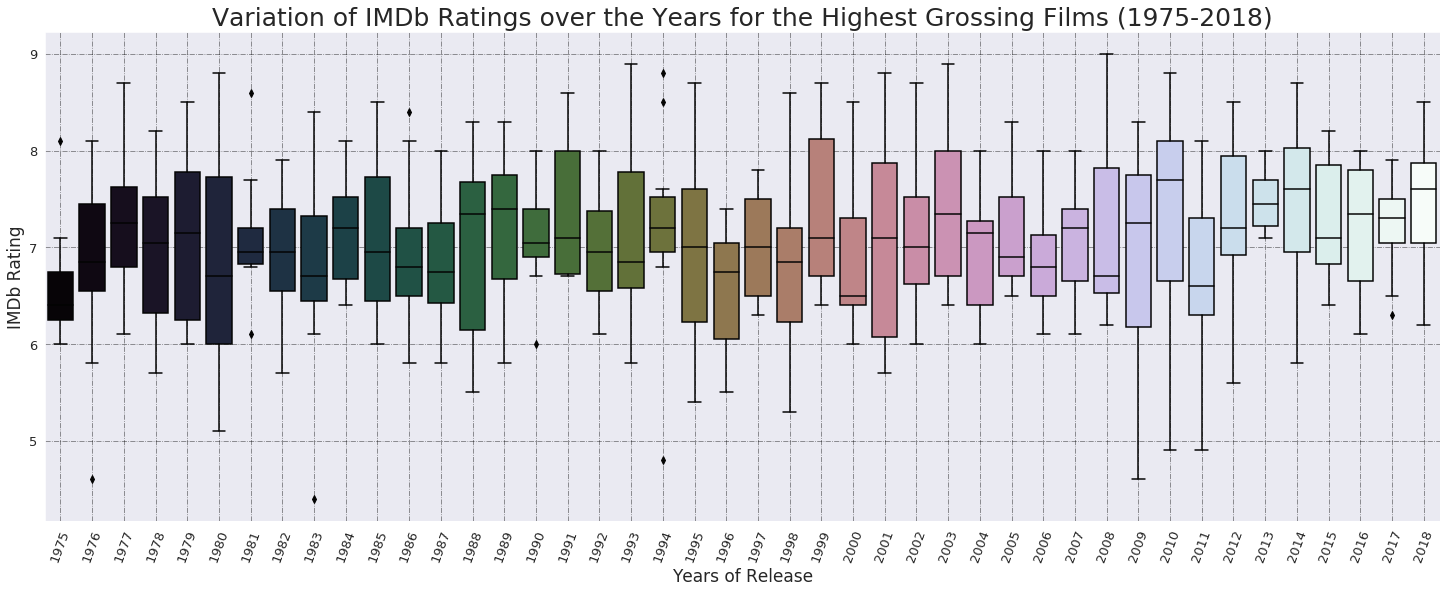

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (25,9))
sns.set_style('darkgrid')

fig = sns.boxplot( x=dataset.year, y=dataset.imdb_rating, palette = "cubehelix")

plt.ylabel('IMDb Rating', fontsize = 17)
plt.xlabel('Years of Release', fontsize = 17)
plt.xticks(rotation = 70, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Variation of IMDb Ratings over the Years for the Highest Grossing Films (1975-2018)', fontsize = 25)
plt.grid(True, alpha = 0.5, linestyle = '-.', color = '#000000')
plt.show()

From the above graph, the following conclusions can be drawn.
* The highest rated film is from year **2008**, the second highest films are from years **1993** and **2003** and the lowest rated film is from **1983**. 
* In the period between **1970s** till **1990s**, 
    1. The highest third quartiles (literally, **the best rated films**) are from the years **1999** and **1991**, with IMDb scores of around **8**.
    2. The lowest first quartile, clubbed with lowest deviation, (literally, **the worst rated films**) is from year **1975**. 
    3. The deviation is the greatest (**gave both very good and very bad films**) in year **1980**. 
    4. The average rating of films from this entire 20-year-period is **7.01. **
* In the period from 2000 till 2018,
    1. The highest third quartiles (again, **the best rated films**) are from the years **2003**, **2010**, **2012** and **2014**, with IMDb scores again around **8**. 
    2. The lowest first quartile, clubbed with lowest deviation, (the **not-so-good** films) are from **2006**. 
    3. The deviation is greatest in year **2001**, hence gave us both very good and very good films as in 1980. 
    4. The mean average rating of films from this entire 20-year-period is **7.15**, higher than the previous period. 

## 2. Length of a Film
A movie's length is one characteristic which viewers keep in mind always, while starting to watch something. Though the length of a cinema does not specifically determine how the quality of the film is (or does, maybe, as we saw in a previous graph [IMDb Rating versus Length of a film](#IMDb-Rating-versus-Length-of-a-film)), a longer film is not an easy watch *sometimes*, which is not always the case again. In this section, we try to find whether there is any relation between `length` and every other parameter available in our data. The lengths(in minutes) of all the listed films are assembled in `length` column of our `dataset`.

###  Length versus Main Genre of a film
The most relevant genre of the film is stored in the `Main_Genre` column of our `dataset`. 

In [60]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace1 = go.Box( # for plotting scatter graph, go.Scatter is used
        y = dataset.length,
        x = dataset.Main_Genre,
        marker = dict(color = 'darkturquoise'), # marker attributes inside graph
        #mode = "markers",
        text = dataset.title # text for each marker during hover
)

data = [trace1]

layout = go.Layout(
    title = 'Lengths v/s Genres of Highest Grossing Films (1975-2018)',
    xaxis = dict(showgrid = True, zeroline = True, gridwidth = 2), 
    yaxis = dict(title = 'Length (in minutes)', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
# for offline glue-ing of plot into notebook
init_notebook_mode(connected=True)
iplot(fig)

From the above graph, the following conclusions can be drawn.
- The **longest** film is a **Fantasy** film (most probably *Lord of the Rings*) and the **shortest** film is a **History** film, which is a documentary. 
- Between lengths **50-100 minutes**, 
    1. The only genres present are **Animation, Comedy, Family** and **Sport** films, among which **Animation** films are the most popular. Both of these conclusions are pretty evident as frequent film watchers know that most animted films are very short in length.
- As expected, lengths between **100-150 minutes** have all the genres included between its extremes.
- Films lengths of above **150 minutes** are only **War** and **History** films, which, too, viewers will mostly agree upon. 
- If you hover over this graph, it is noticed that **History** films have the **highest average** length of 140 minutes and **Animated** films have the **lowest average** of 96.5 minutes. 

###  Lengths versus Distributing Studio of films
The distributing studio of each film is mentioned in the `studio` column of `dataset`.

In [61]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


trace = go.Box(
    x = dataset.studio,
    y = dataset.length,
    text = dataset.title,
    marker = dict(color = 'firebrick')
)

data = [trace]

layout = go.Layout(
    title = 'Variation of Lengths for different Studios of Highest Grossing Films (1975-2018)',
    xaxis = dict(gridwidth = 2),
    yaxis = dict(title = 'Length (in minutes)', gridwidth = 2),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

figure = go.Figure(data = data, layout = layout)
init_notebook_mode(connected=True)
iplot(figure)

From the above graph, the following conclusions can be drawn.
- Between **50-100 minutes**, almost all of the studios have their minimum extrema except Lionsgate and only **Pixar** and **Dreamworks** have more films than any other studio in this time range. This result is analogous to what we saw in the previous [Length versus Main Genre of a film](#Length-versus-Main-Genre-of-a-film) graph because both Pixar and Dreamworks mostly produce and/or distribute animated films. 
- Again, between **100-150 minutes**, almost all the studios make their mark as expected. 
- We can hover over the box to find out that **Warner Bros** distributed the **longest film** of 201 minutes and **National Air and Space Agency** distributed the **shortest documentary** of 27 minutes. 
- The films which have the **highest average** lengths are distributed by **Warner Bros** at 127 minutes and **lowest average** lengths by **Pixar** at a median length of 100 minutes. 


###  Lengths versus Years of Release for films
The year of release for each film is contained by column `year`.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



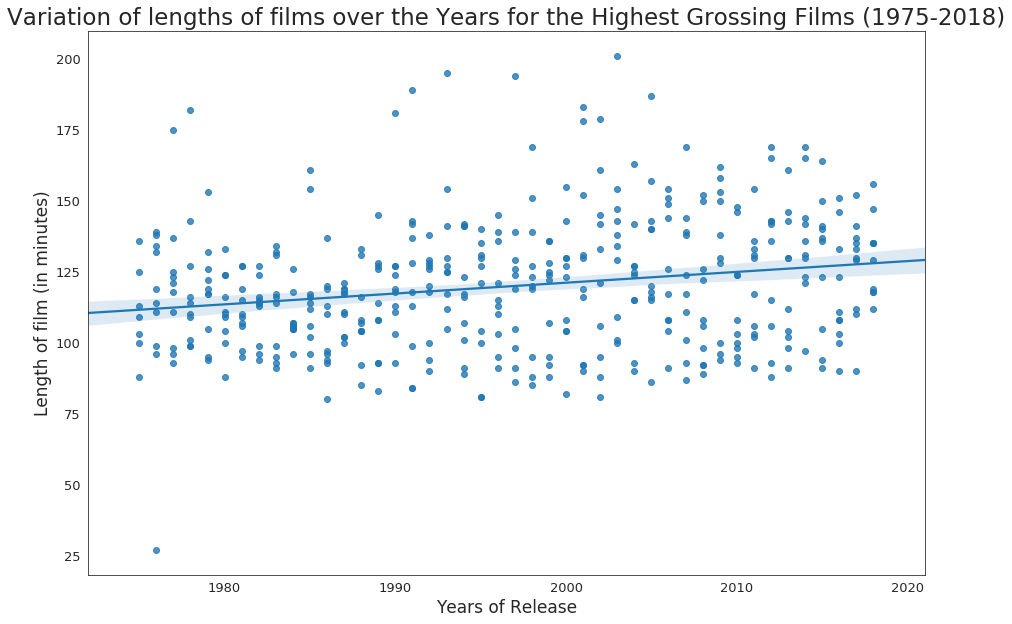

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.set_style('white')

fig = sns.regplot(x="year", y="length", data=dataset)

plt.ylabel('Length of film (in minutes)', fontsize = 17)
plt.xlabel('Years of Release', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Variation of lengths of films over the Years for the Highest Grossing Films (1975-2018)', fontsize = 23)
plt.show()

From the above graph, the following conclusions can be drawn.
- Though this conclusion is not based strongly or does not give us a robust result seeing at the spread of the data points, but we can see from the regression line that the average length of movies have **increased** over the years, though the slope of the line is very small. 

###  Lengths versus Worldwide Gross of films
The worldwide gross for each film is stored in `worldwide_gross` of `dataset`.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



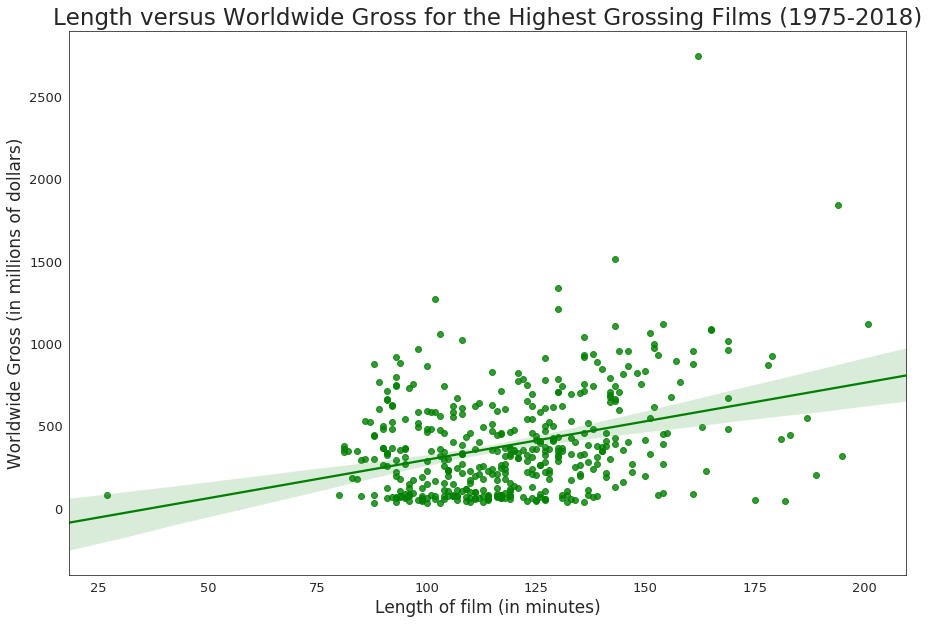

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.set_style('white')

fig = sns.regplot(x="length", y="worldwide_gross", data=dataset, color='g')

plt.ylabel('Worldwide Gross (in millions of dollars)', fontsize = 17)
plt.xlabel('Length of film (in minutes)', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Length versus Worldwide Gross for the Highest Grossing Films (1975-2018)', fontsize = 23)
plt.show()

From the above graph, the following conclusions can be drawn.
- As like our previous graph, though not extremely sturdy, it is seen that `length` is directly proportional to `worldwide_gross`, which means, it is observed throughout the years that **the more the length of the film, the more the film has grossed worldwide**. 

## 3. Maturity Rating of a Film
Maturity rating (or *Content Rating*) rates the suitability of TV broadcasts, movies, comic books, or video games to its audience. A content rating usually places a media source into one of a number of different categories, which tell what age group is suitable to view said media. The individual categories include the stated age groups within the category, along with all ages greater than the ages of that category.

[Motion Picture Association of America](https://www.mpaa.org/) categorizes Hollywood films mainly into 4 categories.
- **G – General Audiences** : All ages admitted. Nothing that would offend parents for viewing by children.
- **PG – Parental Guidance Suggested** : Some material may not be suitable for children. Parents urged to give "parental guidance". May contain some material parents might not like for their young children.
- **PG-13 – Parents Strongly Cautioned** : Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
- **R – Restricted** : Under 17 requires accompanying parent or adult guardian. Contains some adult material. Parents are urged to learn more about the film before taking their young children with them.

The maturity rating of every film is stated in the `rating` column of our `dataset`.

###  Maturity Rating versus Main Genre of a film
The most relevant genre of the film is stored in the `Main_Genre` column of our `dataset`. 

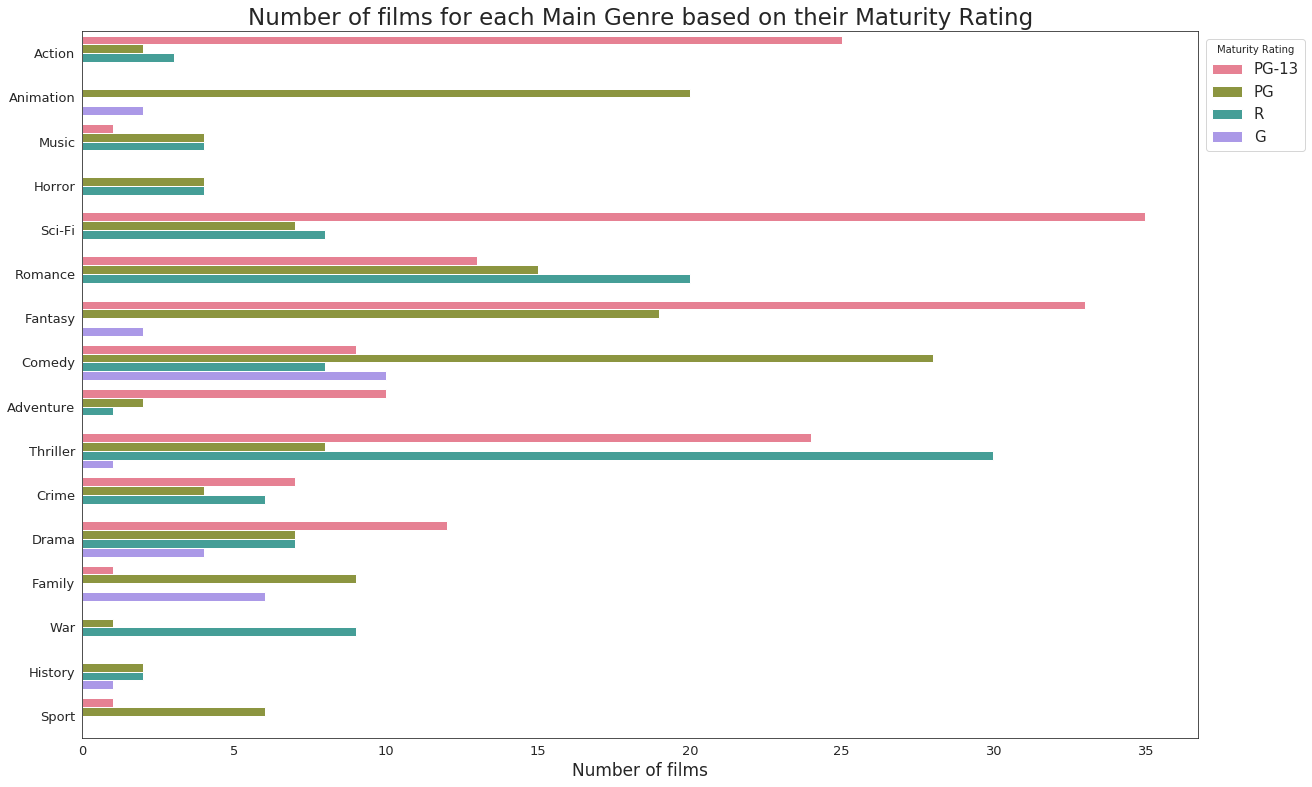

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,13))
sns.set_style('white')

fig = sns.countplot(y="Main_Genre", hue="rating", data=dataset, palette="husl")

plt.ylabel('',fontsize = 17)
plt.xlabel('Number of films', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc=2, prop={'size':15}, title="Maturity Rating")
plt.title('Number of films for each Main Genre based on their Maturity Rating', fontsize = 23)
plt.show()

From the above graph, the following conclusions can be drawn.
- **Sci-Fi** and **Fantasy** films receive the most number of **PG-13** ratings, whereas as imagined, **Horror**, **War** and **History** films have no **PG-13** films, which is probably because these genres are not suitable for children under 13 and mostly contain sex and violence. 
- **PG** films belong mostly to **Animation** and **Comedy** films as these are specifically made for junior audiences. There is no genre where **PG** films are not present.
- **G-rated** films are meant for audience for all ages and has the most number of them in **Comedy** genre. **Crime, Sport, War, Adventure, Romance, Sci-Fi, Horror, Music** and **Action** films do not generally get a **G** rating, which might also be due to the fact that MPAA does not give out G ratings that easily.
- The most interesting part of the graph belongs to **R-rating**, which is meant for restrcited audience and will surely have blood, gore, sex and violence, like a popular movie by Marvel last year, *Deadpool*. **Thriller** films get the most **R-ratings**, whereas **Sport, Family, Fantasy** and **Animation** films usually never get an **R-rating**. 

###  Maturity Rating versus Distributing Studio of a film
The distributing studio of each film is mentioned in the `studio` column of `dataset`.

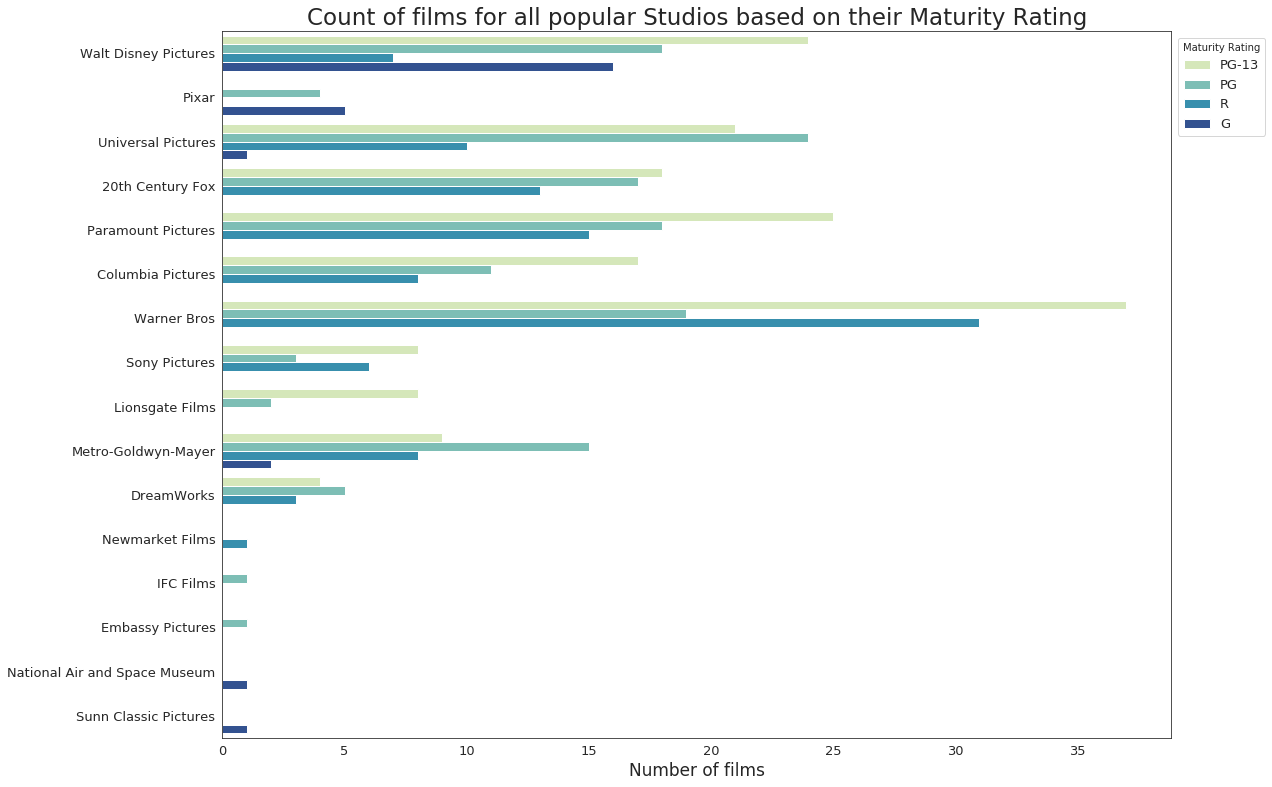

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (17,13))
sns.set_style('white')

fig = sns.countplot(y="studio", hue="rating", data=dataset, palette="YlGnBu")

plt.ylabel('',fontsize = 17)
plt.xlabel('Number of films', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc=2, prop={'size':13}, title="Maturity Rating")
plt.title('Count of films for all popular Studios based on their Maturity Rating', fontsize = 23)
plt.show()

From the above graph, the following conclusions can be drawn. *I will ignore the last 5 studios as they have only one film each in `dataset`.*
- **Warner Bros** produce the most number of **PG-13** films. With films like *The Dark Knight* and franchises like *Harry Potter*, that is pretty much expected. Since **Pixar** mostly produces **Animated** films, it has no **PG-13** films. 
- Films which *suggest* parental guidance or **PG** films have been produced by all of the major studios, the most by **Universal Pictures**, having produced films from franchises like *Jurassic Park* and *The Mummy*.
- With some critically acclaimed animated films in the 90s like *The Lion King* and *Toy Story*, **Walt Disney Pictures** has the most number of **G-rated** films, which is meant for audience of all ages. Most of the studios did never produce a **G-rated** film, which may again be due to MPAA's reluctance to give away G-ratings so easily. 
- Contraditorily, **Universal Pictures** have also produced the most number of **R-rated** films meant for restricted audience, with films like *Schindler's List* and *The Deer Hunter*. **Pixar** and **Lionsgate Films** have no film with an R-rating in this list. 

###  Maturity Rating versus Worldwide Gross of films
The worldwide gross for each film is stored in `worldwide_gross` of `dataset`.

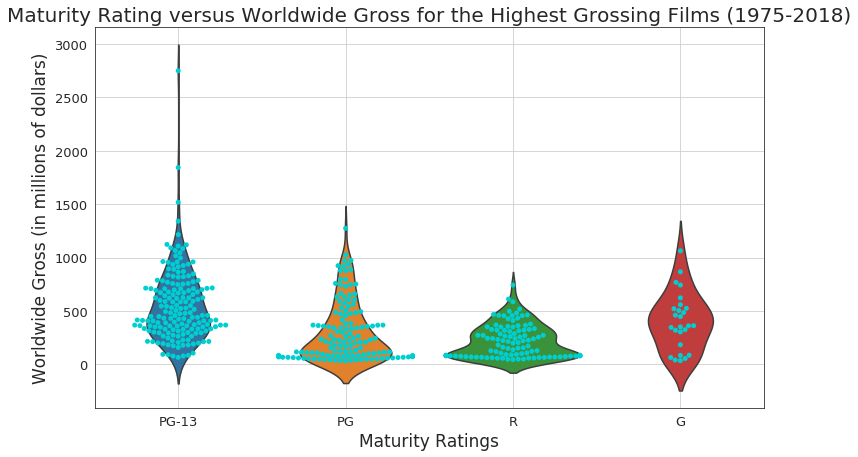

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,7))
sns.set_style('white')

dataset.worldwide_gross = dataset.worldwide_gross.astype(float) #because violinplot needs one axis to be of float values.
ax = sns.violinplot(x="rating", y="worldwide_gross", data=dataset, inner = None) #inner=None to delete the middle line inside the violins. 
ax = sns.swarmplot(x="rating", y="worldwide_gross", data=dataset, color = '#00CED1', edgecolor = 'gray')

plt.ylabel('Worldwide Gross (in millions of dollars)', fontsize = 17)
plt.xlabel('Maturity Ratings', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.grid(True)
plt.title('Maturity Rating versus Worldwide Gross for the Highest Grossing Films (1975-2018)', fontsize = 20)
plt.show()

From the above graph, the following conclusions can be drawn.
- **PG-13** and **G** rated movies mostly earn around **400-450 million dollars** the most, though this is not the case for all movies as the graph shows a few PG-13 films much more than that gross range and even the highest grossed movie among all the highest grossing movies in the entire period. 
- Both **PG** and **R**-rated films earn much less on an average than the other ratings with most grosses around **100-200 million dollars**.

###  Maturity Ratings versus Years of Release for films
The year of release for each film is contained by column `year`.

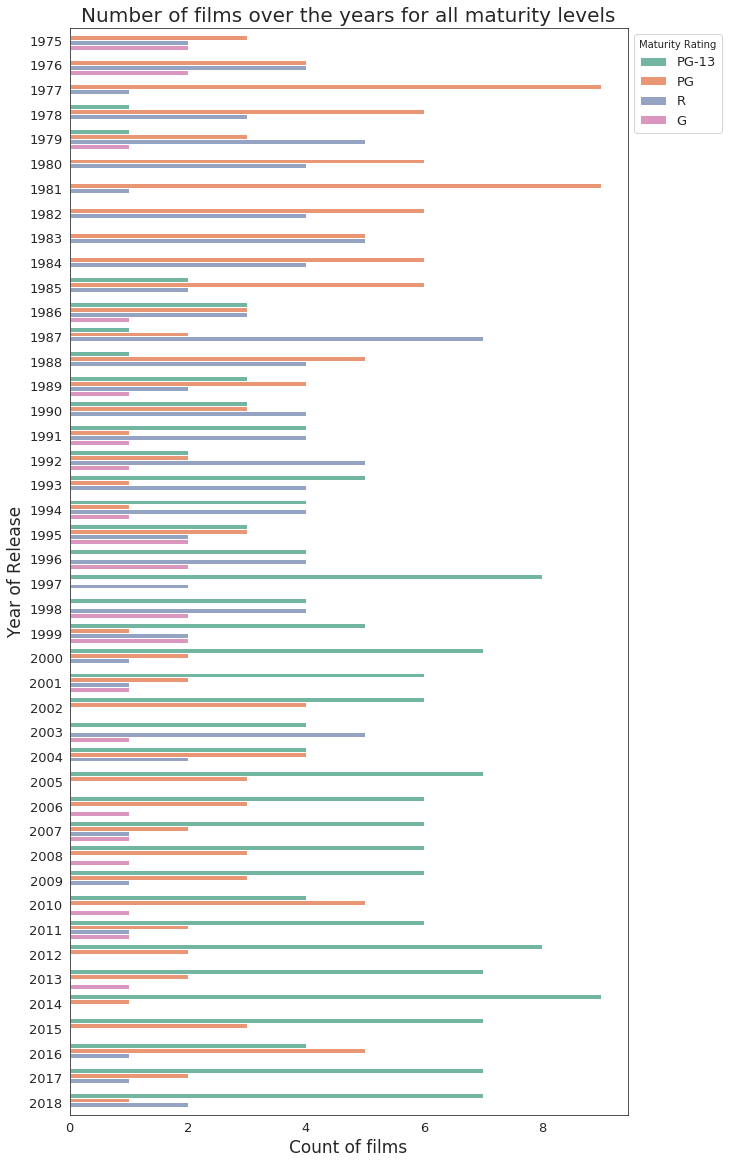

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,20))
sns.set_style('white')

fig = sns.countplot(y="year", hue="rating", data=dataset, palette="Set2")

plt.ylabel('Year of Release', fontsize = 17)
plt.xlabel('Count of films', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(bbox_to_anchor=(1,1), loc=2, prop={'size':13}, title="Maturity Rating")
plt.title('Number of films over the years for all maturity levels', fontsize = 20)
plt.show()

From the above graph, the following conclusions can be drawn.
- **PG** films were dominating the list **till the 1990s**. The orange bars are pretty overwhelming in the top part of the graph and do not appear much in the lower part. 
- From 1990s till last year, the most common are the **PG-13** films. The green bars follow the opposite route against the orange bars for PG films in the upper and lower part of the graph.
- Films with an **R-rating** appeared the most till the first years of the 2000s, and declined after that. And **G-rated** films do not appear much in any year. 

**Note**: The transverse path of PG and PG-13 films with an intersection point at around year 1990 might have happened because MPAA became more strict while rating films from that period onwards. There are many films nowadays where the film crew and cast openly protest against the rating system, about being *unncessarily* tough, so a more regular stringency since the 1990s is not a surprise.

## 4. Worldwide Gross of a Film
Though the worldwide gross of a film has been plotted against every other parameter, we are yet to see how the gross has performed over the years. 

###  Worldwide Gross versus Years of Release for films
The year of release for each film is contained by column `year`.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



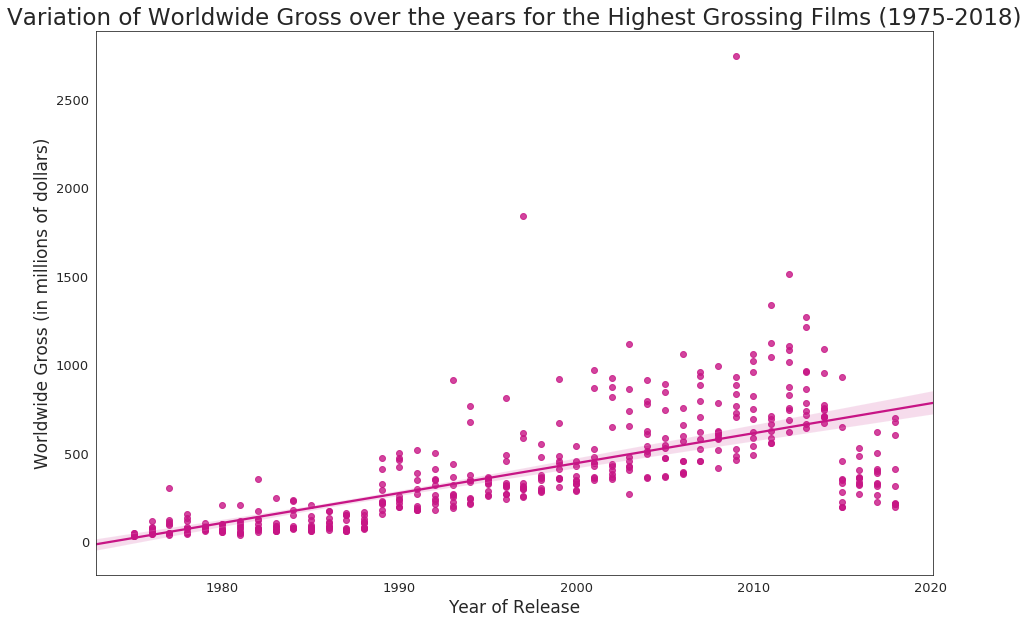

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.set_style('white')

fig = sns.regplot(x="year", y="worldwide_gross", data=dataset, color='#C71585')

plt.ylabel('Worldwide Gross (in millions of dollars)', fontsize = 17)
plt.xlabel('Year of Release', fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Variation of Worldwide Gross over the years for the Highest Grossing Films (1975-2018)', fontsize = 23)
plt.show()

From the above graph, the following conclusion can be drawn. 
- Though the `worldwide_gross` values have been changed after inflation when they were extracted from Box Office Mojo, we see a steep positive slope in the regression line, which indicates the gross of the films **increased** largely over the years.

## 5. Producing Studio of a Film
A production company, production house, production studio, or a production team provides the physical basis for works in the realms of the performing arts, new media art, film, television, radio, comics, interactive arts, video games, websites, and video. Production teams are a group of technical staff who produce the media, generally the term refers to all individuals responsible for the technical aspects of creating of a particular product, regardless of where in the process their expertise is required, or how long they are involved in the project. For example, in a theatrical performance, the production team includes not only the running crew, but also the theatrical producer, designers and theatre direction.



###  Production Studio versus Worldwide Gross of films
The worldwide gross for each film is stored in `worldwide_gross` of `dataset`.

In [69]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


trace = go.Box(
    x = dataset.studio,
    y = dataset.worldwide_gross,
    text = dataset.title,
    marker = dict(color = '#4B0082')
)

data = [trace]

layout = go.Layout(
    title = 'How does the famous studios perform at the box office?',
    xaxis = dict(gridwidth = 2),
    yaxis = dict(title = 'Worldwide Gross (in millions of dollars)', gridwidth = 2, zeroline = False),
    hovermode = 'closest',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

figure = go.Figure(data = data, layout = layout)
init_notebook_mode(connected=True)
iplot(figure)

From the above graph, the following conclusions can be drawn. *I ignore the last five studios from the analysis as they only have one film each in the list.*
- If we hover on the highest box-office success, *Avatar* was produced by **20th Century Fox**, earning a huge 2749 million dollars. 
- The least grossed film was produced by **Metro-Goldwyn-Mayer** at 38 million dollars.
- The highest averaged gross is of **Lionsgate Films** at around 703 million dollars and then comes **Pixar** at 608 million dollars on an average. 

**Note**: We have send a trend that `worldwide_gross` has increased over each `year` in [Worldwide Gross versus Years of Release for films](#Worldwide-Gross-versus-Years-of-Release-for-films) and since studios like **Paramount, Warner Bros** and **Universal Pictures**, to name a few, had been producing films since the 1980s and studios like **Pixar** and **Dreamworks** are relatively newer, this difference in the average grosses can be explained. 

# **End Note**

Here ends the complete end-to-end data visualization project for [Top 10 Highest Grossing Films since 1975](#About-the-Project). Any extensions and any more visualizations, if possible, can be done by forking this notebook. The dataset which I uploaded will be updated at the end of each year to keep the dataset live. Thank you for keeping patience till the end. :D
